# Minimum Temperature Trends at Sondrestrom, GL

The following is an analysis of the maximum and minimum temperature trends reported at a weather station on the Southwest coast of Greenland. I chose this site to study for two reasons. First, because the Greenland ice sheet is of critical importance to the Earth's systems. Increased warming here could result in the melting of the Greenland ice sheet, which would cause sea level rise and potentially a shutdown of the Gulf Stream, an oceanic current which distributes heat around the globe. The second reason I chose this site is for its location at a far Northern latitude. Warming trends are amplified closer to the poles, so it might be easier to observe them in the far North. I studied the minimum temperature, because this will show us how many days out of the year had a temperature below freezing. 

This station is near the coast, about 50m above sea level. Ideally I would have liked to have found data from a station further inland on or near the ice sheet, where the temperature influence of the ocean would also be less important. However, I couldn't find any stations with current data located away from the coast.

In [1]:
import pandas as pd
import holoviews as hv
import hvplot.pandas
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np


In [2]:
greenland_url = (
    'https://www.ncei.noaa.gov/access/services/da'f'ta/v1'
    '?dataset=daily-summaries'
    '&dataTypes=TMIN,PRCP,TMAX'
    '&stations=GLW00016504'
    '&units=standard'
    '&startDate=1947-10-01'
    '&endDate=2024-09-18')
greenland_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TMIN,PRCP,TMAX&stations=GLW00016504&units=standard&startDate=1947-10-01&endDate=2024-09-18'

In [3]:
# Import data into Python from NCEI API
greenland_climate_df = pd.read_csv(
    greenland_url,
    index_col='DATE',
    parse_dates=True)
greenland_climate_df

HTTPError: HTTP Error 500: 

In [ ]:
greenland_climate_df = greenland_climate_df[['PRCP', 'TMIN', 'TMAX']]
greenland_climate_df

,PRCP,TMIN,TMAX
DATE,,,
1947-11-22,0.00,-7.0,-3.0
1947-12-05,0.00,-8.0,-1.0
1949-01-01,0.00,-19.0,9.0
1949-01-02,0.06,-2.0,10.0
1949-01-03,0.04,-10.0,11.0
...,...,...,...
2020-12-28,NaN,8.0,47.0
2020-12-29,NaN,17.0,31.0
2020-12-30,NaN,23.0,34.0


<Axes: xlabel='DATE'>

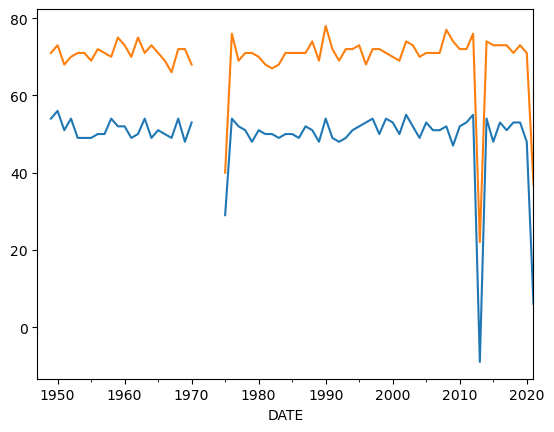

In [ ]:
greenland_climate_df.TMIN.resample('YS').max().plot()
greenland_climate_df.TMAX.resample('YS').max().plot()
#greenland_climate_df.PRCP.plot()

In [ ]:
# store the df for later use.

%store greenland_climate_df

Stored 'greenland_climate_df' (DataFrame)


<Axes: ylabel='Frequency'>

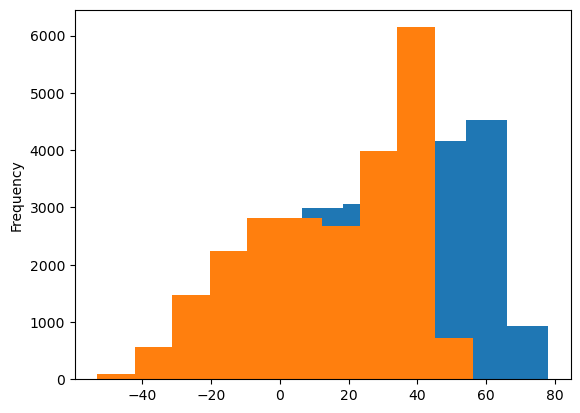

In [ ]:
greenland_climate_df.TMAX.plot.hist()
greenland_climate_df.TMIN.plot.hist()

In [ ]:
# define a new dataframe, renaming the columns to include correct units.

greenland_climate_df_u = greenland_climate_df.rename(columns={
    'TMAX': 'TMAX_F',
    'TMIN': 'TMIN_F'
})

greenland_climate_df_u

,PRCP,TMIN_F,TMAX_F
DATE,,,
1947-11-22,0.00,-7.0,-3.0
1947-12-05,0.00,-8.0,-1.0
1949-01-01,0.00,-19.0,9.0
1949-01-02,0.06,-2.0,10.0
1949-01-03,0.04,-10.0,11.0
...,...,...,...
2020-12-28,NaN,8.0,47.0
2020-12-29,NaN,17.0,31.0
2020-12-30,NaN,23.0,34.0


In [ ]:
# define the df as a function that converts Farenheit to Celsius.

#greenland_climate_df_u['TMIN_C'] = (greenland_climate_df_u['TMIN_F']-32)*5/9
greenland_climate_df_u['TMAX_C'] = (greenland_climate_df_u['TMAX_F']-32)*5/9
greenland_climate_df_u['TMIN_C'] = (greenland_climate_df_u['TMIN_F']-32)*5/9
greenland_climate_df_u

,PRCP,TMIN_F,TMAX_F,TMAX_C,TMIN_C
DATE,,,,,
1947-11-22,0.00,-7.0,-3.0,-19.444444,-21.666667
1947-12-05,0.00,-8.0,-1.0,-18.333333,-22.222222
1949-01-01,0.00,-19.0,9.0,-12.777778,-28.333333
1949-01-02,0.06,-2.0,10.0,-12.222222,-18.888889
1949-01-03,0.04,-10.0,11.0,-11.666667,-23.333333
...,...,...,...,...,...
2020-12-28,NaN,8.0,47.0,8.333333,-13.333333
2020-12-29,NaN,17.0,31.0,-0.555556,-8.333333
2020-12-30,NaN,23.0,34.0,1.111111,-5.000000


In [ ]:
greenland_climate_df = greenland_climate_df_u[['TMAX_C', 'TMIN_C']]
# greenland_climate_df = greenland_climate_df_u[['TMIN_C']]
greenland_climate_df

,TMAX_C,TMIN_C
DATE,,
1947-11-22,-19.444444,-21.666667
1947-12-05,-18.333333,-22.222222
1949-01-01,-12.777778,-28.333333
1949-01-02,-12.222222,-18.888889
1949-01-03,-11.666667,-23.333333
...,...,...
2020-12-28,8.333333,-13.333333
2020-12-29,-0.555556,-8.333333
2020-12-30,1.111111,-5.000000


<Axes: title={'center': 'Maximum Temperature in Sondrestrom over Time'}, xlabel='Date', ylabel='Maximum Temperature (C)'>

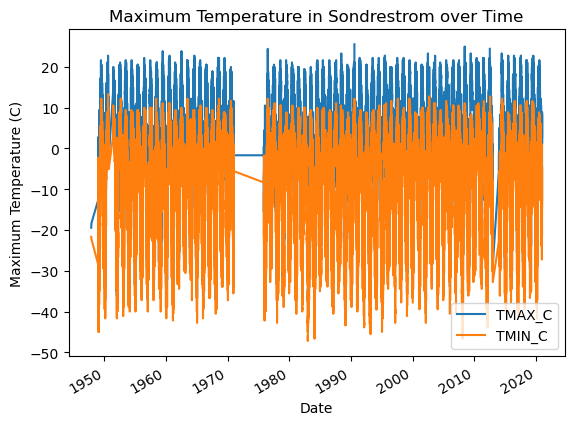

In [ ]:
# Plot the data using .plot
# greenland_climate_df.plot(
#     y='PRCP',
#     title='Precipitation in Sondrestrom over Time',
#     xlabel='Date',
#     ylabel='Precipitation (in.)')
# Plot the data using .plot
greenland_climate_df.plot(
    y=['TMAX_C', 'TMIN_C'],
    title='Maximum Temperature in Sondrestrom over Time',
    xlabel='Date',
    ylabel='Maximum Temperature (C)'
    )

In [ ]:
gl_ann_climate_df = greenland_climate_df.resample('YS').mean()
gl_ann_climate_df

,TMAX_C,TMIN_C
DATE,,
1947-01-01,-18.888889,-21.944444
1948-01-01,NaN,NaN
1949-01-01,-3.070015,-11.859970
1950-01-01,1.064306,-7.413512
1951-01-01,3.009024,-4.455725
...,...,...
2017-01-01,1.192449,-9.058770
2018-01-01,-0.575342,-9.972603
2019-01-01,2.750230,-8.100704


<Axes: title={'center': 'Average Annual Max and Min Temperature in Sondrestrom over Time'}, xlabel='Date', ylabel='Temperature ($^\\circ$C)'>

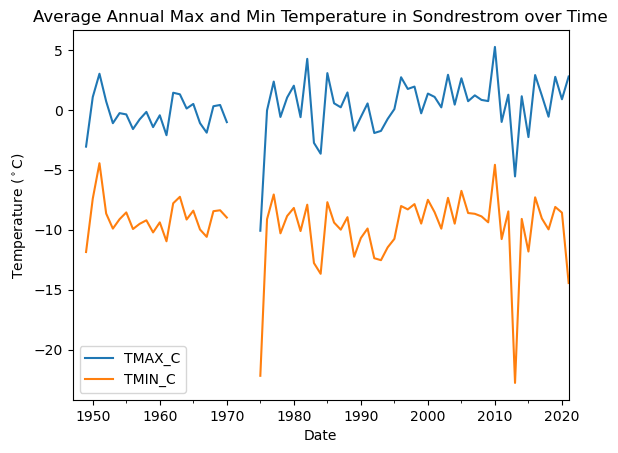

In [ ]:
# Plot the annual data
gl_ann_temp_plot = gl_ann_climate_df.plot(
    y=['TMAX_C', 'TMIN_C'],
    title='Average Annual Max and Min Temperature in Sondrestrom over Time',
    xlabel='Date',
    ylabel='Temperature ($^\circ$C)')
gl_ann_temp_plot

###Observations about the data:
*There's a gap in the data from 1970-1975
*There appear to be anomalously low temperatures recorded in 1975. These could be a result of anomalously cold weather patterns, or they could be a result of data collection errors.

In [ ]:
# Plot the annual data interactively
temp_interactive_plot = gl_ann_climate_df.hvplot(
    y=['TMAX_C', 'TMIN_C'],
    title='Average Annual Maximum Temperature in Sondrestrom over Time',
    xlabel='Date',
    ylabel='Temperature (Degrees Celsius)')
temp_interactive_plot

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:NdOverlay   [Variable]
   :Curve   [DATE]   (value)

I plotted both the Maximum and Minimum temperatures so that it's possible to get a sense of when snow and ice might be accumulating on the ice sheet versus when it would be melting. The lowest recorded minimum average temperature value was 22.778 degrees Celsius, and the highest recorded maximum average temperature was 5.245 degrees Celsius.

In [ ]:
hv.save(temp_interactive_plot, 'Sondrestrom_ann_temp_plot.html')

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


<Axes: xlabel='DATE'>

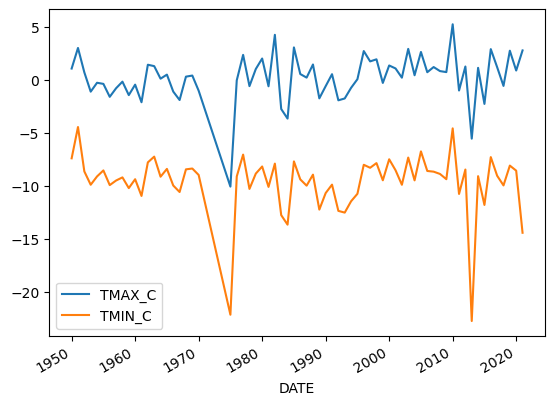

In [ ]:
# filter the data
include = (
    gl_ann_climate_df[['TMAX_C', 'TMIN_C']]
    .resample('YS')
    .count()
     / 365
    > 0.001
)

# Assuming ann_climate_ is your DataFrame with 'Year' as the index and 'Temperature' as the column
ann_climate_df_clean = (
    gl_ann_climate_df
    [include]
    .loc['1950':]
    .dropna()
)    
# ann_climate_df_clean.plot(y=['TMAX_C', 'TMIN_C'])


# gl_ann_climate_df[include].plot(
#     y=['TMAX_C', 'TMIN_C'],
#     title='Filtered Maximum and Minimum Temperatures Over Time',
#     xlabel='Date',
#     ylabel='Temperature (C)')

ann_climate_df_clean.plot(y=['TMAX_C', 'TMIN_C'])


<Axes: ylabel='Frequency'>

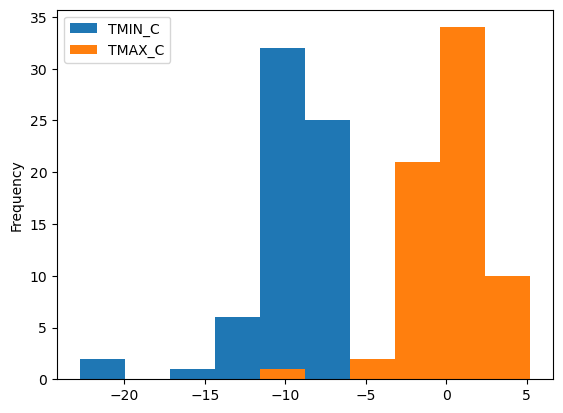

In [ ]:
ann_climate_df_clean[['TMIN_C', 'TMAX_C']].plot.hist()

In [ ]:
# Reshape date to be a 2D array for scikit-learn
predictor = ann_climate_df_clean.index.year.values.reshape(-1, 1)
observed = ann_climate_df_clean[['TMAX_C', 'TMIN_C']].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(predictor, observed)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


Slope: [0.02151851]
Intercept: [-42.53200314  20.02876327]


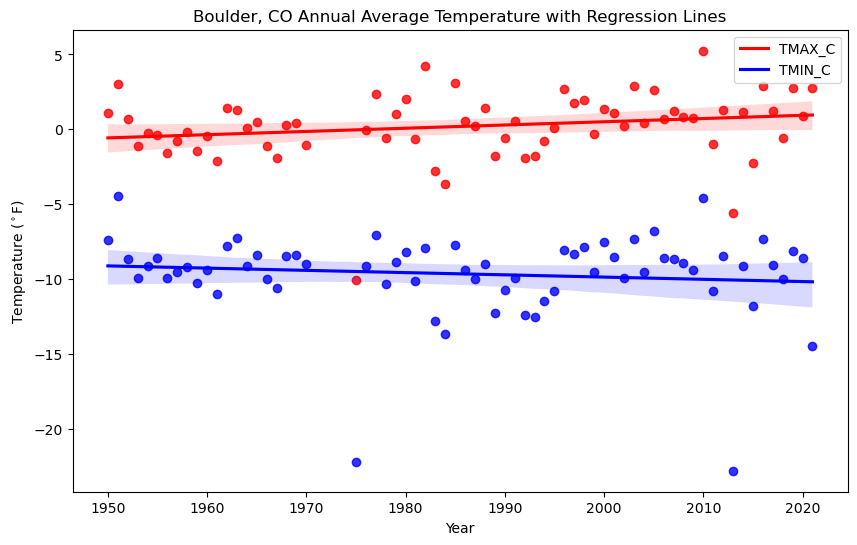

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot TMAX_C regression line
sns.regplot(
    x=ann_climate_df_clean.index.year,
    y=ann_climate_df_clean['TMAX_C'],
    ax=ax,  # Use the same axes for both plots
    scatter_kws={'color': 'red'},  # Optional: Customize scatter points
    line_kws={'color': 'red', 'label': 'TMAX_C'}  # Optional: Customize the line
)

# Plot TMIN_C regression line
sns.regplot(
    x=ann_climate_df_clean.index.year,
    y=ann_climate_df_clean['TMIN_C'],
    ax=ax,  # Use the same axes
    scatter_kws={'color': 'blue'},  # Optional: Customize scatter points
    line_kws={'color': 'blue', 'label': 'TMIN_C'}  # Optional: Customize the line
)

# Set plot labels and title
ax.set(
    title='Boulder, CO Annual Average Temperature with Regression Lines',
    xlabel='Year',
    ylabel='Temperature ($^\circ$C)'
)

# Display legend
ax.legend()

# Display the plot
plt.show()


In [ ]:
# Add a constant term to the independent variable (for intercept)
predictor = sm.add_constant(predictor)

# Fit the OLS model
model = sm.OLS(observed, predictor).fit()

# Print the model summary
print(model.summary())

# Test

ValueError: shapes (68,2) and (68,2) not aligned: 2 (dim 1) != 68 (dim 0)